# Introduction
In this project i will be training a machine learning model on a heart disease dataset to predict if someone has a heart disease or not. There are 11 attributes in the dataset that might help to predict if a patient has a heart disease. With those attributes i am trying to research how accurately can machine learning models use demographic factors, clinical measurements, and symptoms to classify individuals with and without heart disease and identifying high-risk combinations of risk factors?

Every year about 31% of all deaths are cardiovascular disease related. Early detection and management of CVDs are imperative for individuals either afflicted with the condition or at high risk due to factors like hypertension, diabetes, hyperlipidemia, or pre-existing diseases. Timely intervention significantly improves outcomes and reduces mortality rates. This is where machine learning models emerge as invaluable tools.

A little about the dataset that will be used in this project. It is a combination of patients with and without a heart disease from 5 different countries:
* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

That makes a total of 1190 observations but of that 272 observations are duplicated so the final dataset is 918 observations.

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link:
https://archive.ics.uci.edu/dataset/45/heart+disease

## Importing packages for python, plots and machine learning models

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFpr, SelectFdr, chi2, f_classif
from sklearn.model_selection import cross_val_score

## Data
Making a dataframe of the data.
And printing the first 5 rows

In [2]:
df = pd.read_csv("heart.csv") # reading in the file contents
df.head()

The data consists of 7 numeral and 5 nominal attributes

To determine the amount of unique values n the dataset.

In [4]:
print(df.nunique()) 

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


To gain insights into the characteristics of each attribute within the dataset

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


conclusion about unique values and info:
- Age, RestingBP, cholesterol, max hr and oldpeak have very high unique numbers so those numbers range alot
- 2/3/4 unique numbers at some attributes aka very low numbers indicating that those attributes are probably categorical this is true for sexes, chest pain, fastingBS, restingECG, exercise angina, st_slope and heart disease
- the non-null count indicates that there are no N.A. in the data

To ascertain the presence of duplicated rows within the dataset

In [6]:
df.duplicated().sum()

0

There are no duplicated rows just like the data was explained in the paper.


### Explanation of the 12 attributes in the dataset:

- **Age**: The age of the participant in years.
  
- **Sex**: The gender of the participant (M: Male, F: Female).
  
- **Chest Pain Type**: Describes the type of chest discomfort experienced by the participant:
    - **Typical Angina (TA)**: Chest pain or discomfort typically associated with heart problems, often triggered by physical exertion or emotional stress.
    - **Atypical Angina (ATA)**: Chest discomfort that doesn't fully meet the criteria for typical angina but still suggests a possible heart-related issue. The symptoms may vary and could include shortness of breath, nausea, or fatigue.
    - **Non-Anginal Pain (NAP)**: Chest discomfort not originating from the heart, which could be due to musculoskeletal issues, respiratory problems, gastrointestinal conditions, or anxiety.
    - **Asymptomatic (ASY)**: The participant does not experience any symptoms related to chest discomfort.

- **Resting Blood Pressure**: The participant's blood pressure measured while at rest, in millimeters of mercury (mm Hg).
  
- **Cholesterol**: The level of cholesterol in the participant's blood serum, measured in milligrams per deciliter (mm/dl).
  
- **Fasting Blood Sugar**: Indicates the participant's fasting blood sugar level:
    - **1**: If fasting blood sugar is greater than 120 mg/dl.
    - **0**: Otherwise.

- **Resting Electrocardiogram Results**: Interpretation of the resting electrocardiogram (ECG) findings:
    - **Normal**: ECG shows no abnormalities.
    - **ST**: ECG shows abnormalities in the ST-T wave, such as T wave inversions or ST elevation/depression of more than 0.05 millivolts (mV).
    - **LVH**: ECG suggests probable or definite left ventricular hypertrophy (enlargement of the heart's left ventricle) according to Estes' criteria.
  
- **Maximum Heart Rate Achieved**: The highest heart rate achieved during physical exertion, measured in beats per minute (bpm).

- **Exercise-Induced Angina**: Indicates whether the participant experienced angina (chest pain or discomfort) during exercise:
    - **Y**: Yes, the participant experienced exercise-induced angina.
    - **N**: No, the participant did not experience exercise-induced angina.
  
- **Oldpeak**: Refers to the ST depression observed during exercise, measured as a numeric value.

- **ST Slope**: Describes the slope of the peak exercise ST segment(segment wave, "ST" refers to a specific portion of the ECG waveform the interval between ventricular depolarization and repolarization) observed on the ECG:
    - **Up**: The ST segment slopes upwards during exercise.
    - **Flat**: The ST segment remains flat during exercise.
    - **Down**: The ST segment slopes downwards during exercise.
  
- **Heart Disease**: Indicates the presence or absence of heart disease:
    - **1**: Heart disease is present.
    - **0**: No heart disease is detected.

A codebook made of the dataset with help from the publications of the data.

In [7]:
codebook={
    "attribute": ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'],
    "unit": ["year", "n.a.", "n.a.", "mm of Hg", "mm/dl", "n.a.", "n.a.", "bpm", "n.a.", "st depression", "n.a.", "n.a."],
    "dtype": ["int64", "category", "category", "int64", "int64", "catergory", "category", "int64", "category", "float64", "category", "catergory"],
    "description": [
        "The age of the participant", 
        "The gender of the participant", 
        "The type of pain the participant is experiencing", 
        "Recorded blood pressure at rest", 
        "The level of cholesterol in the participant's blood serum", 
        "Indicates the participant's fasting blood sugar level", 
        "Interpretation of the resting electrocardiogram (ECG) findings",
        "Maximum heat rate achieved during physical extraction", 
        "Indicates whether the participant experienced angina during exercise", 
        "ST depression observed during exercise", 
        "The slope of the peak exercise ST segment observed on the ECG", 
        "Indicates the presence or absence of heart disease"
    ]
}
pd.DataFrame(codebook).set_index("attribute")

,unit,dtype,description
attribute,,,
Age,year,int64,The age of the participant
Sex,n.a.,category,The gender of the participant
ChestPainType,n.a.,category,The type of pain the participant is experiencing
RestingBP,mm of Hg,int64,Recorded blood pressure at rest
Cholesterol,mm/dl,int64,The level of cholesterol in the participant's ...
FastingBS,n.a.,catergory,Indicates the participant's fasting blood suga...
RestingECG,n.a.,category,Interpretation of the resting electrocardiogra...
MaxHR,bpm,int64,Maximum heat rate achieved during physical ext...
ExerciseAngina,n.a.,category,Indicates whether the participant experienced ...


The data consists of 5 numeric and 7 categorical attributes. 

Verified that there are 918 rows and 12 attributes in the dataframe.

In [8]:
df.shape

(918, 12)

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In conclusion:
- Upon examining the dataset, it's evident that certain attributes such as resting blood pressure and cholesterol contain __minimum values of 0__, which are biologically implausible and likely indicative of missing data. 
- This underscores the necessity of __data cleaning and preprocessing steps__ to address such anomalies and ensure the integrity of subsequent analyses.

## Data Processing

In the following data preprocessing step, we aim to improve the integrity of the dataset by removing rows containing unnatural values. Specifically, we will eliminate rows with a resting blood pressure (RestingBP) value of 0, as well as rows with a cholesterol value of 0. This process ensures that the data remains accurate and suitable for analysis, free from unrealistic entries that may skew results.

In [10]:
# Deleting rows with 0 restingBP
df = df[df['RestingBP'] != 0]

# Deleting rows with 0 cholesterol
df = df[df['Cholesterol'] != 0]

## EDA univariaat
### Numeric data

To provide a description of attributes containing numerical values

#### Distribution with boxplot 
To enhance clarity in visualizing the data distribution, __two separate boxplots were generated__. One boxplot focuses on __the subset of data with larger numbers, while the other highlights data points around 1__. This segregation enables a more detailed examination of each subset's characteristics and facilitates better insights into their respective distributions.

The initial boxplot illustrates the distributions of variables with lower numerical values, including Oldpeak, FastingBS, and HeartDisease. This segmentation allows for a focused analysis of these attributes' spread and central tendencies, aiding in the identification of potential patterns or outliers within this subset of the data.

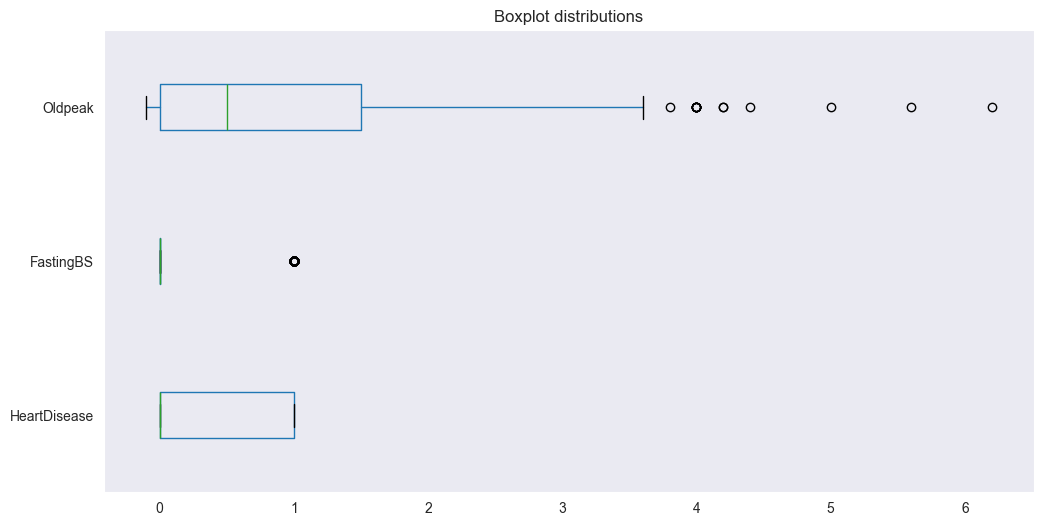

In [11]:
attributes_low = ["HeartDisease", "FastingBS", "Oldpeak"]
filtered_df_low = df[attributes_low]
axs = filtered_df_low.boxplot(grid=False, vert=False, figsize=(12, 6))
axs.set_title("Boxplot distributions")
plt.show()

In conclusion, the analysis of the boxplot reveals distinct characteristics of the variables under consideration. Heartdisease exhibits a relatively normal distribution, suggesting a typical spread of values. Fastingbs predominantly consists of 0 values, with outliers occurring at 1, indicating a potential anomaly in the data. Meanwhile, Oldpeak spans between -2 and approximately 3.7, with outliers extending beyond 3.7 up to 6. These observations provide valuable insights into the distribution patterns and potential outliers within each variable, facilitating further investigation and data refinement processes.

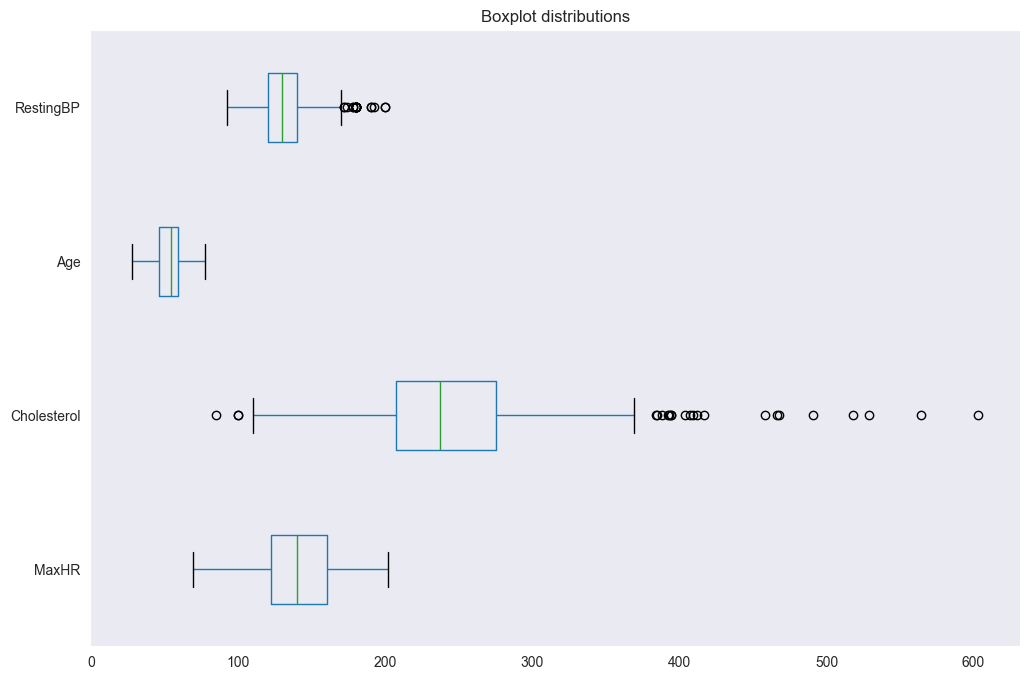

In [12]:
attributes_high = ["MaxHR", "Cholesterol", "Age", "RestingBP"]
filtered_df_high = df[attributes_high]
axs = filtered_df_high.boxplot(grid=False, vert=False, figsize=(12, 8))
axs.set_title("Boxplot distributions")
plt.show()

In conclusion, after some literature reading investigating outliers in resting blood pressure (RestingBP) and cholesterol levels, it became evident that higher values in these attributes correspond to an increased likelihood of heart disease, corroborating existing medical literature. Similarly, outliers in maximum heart rate (MaxHR) suggest a potential association, with lower rates possibly indicating a higher risk of heart disease. These findings underscore the importance of considering these physiological markers in assessing cardiovascular health and risk factors within the dataset.

#### Distribution with histograms
To visualize the numeric values of the attributes maxhr, cholesterol, age, restingbp, and oldpeak, histograms can be employed. Histograms provide a graphical representation of the distribution of numerical data, allowing for insights into their central tendencies, spread, and potential outliers. By examining these histograms, we can gain a better understanding of the distribution patterns of each attribute within the dataset.

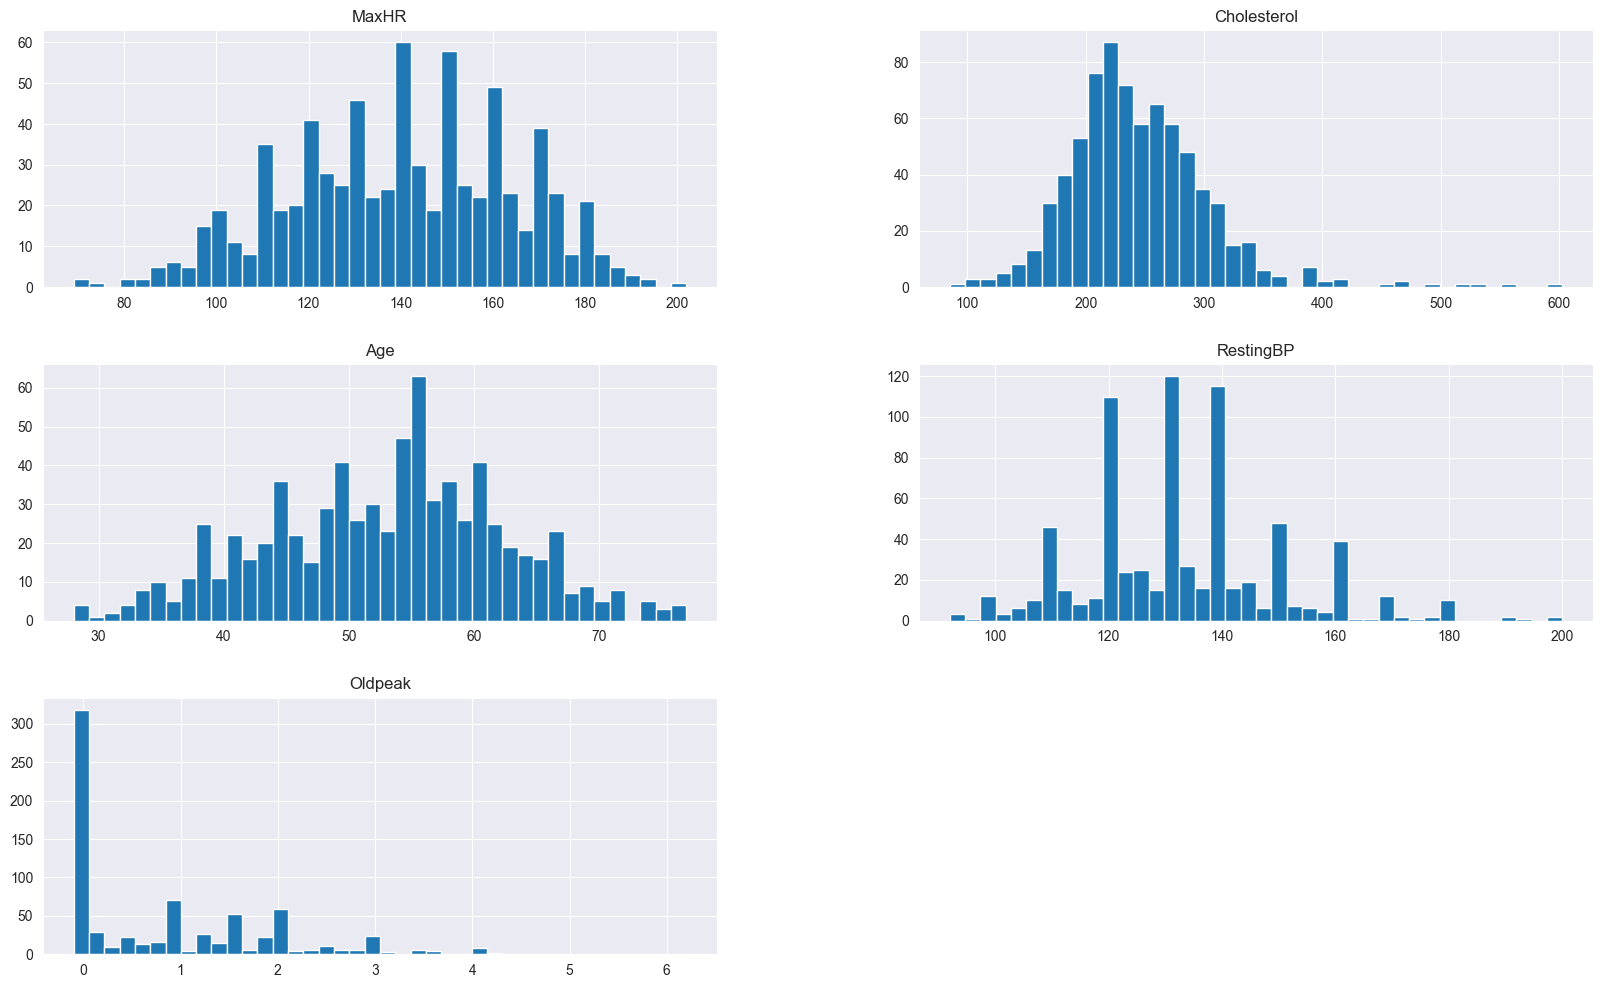

In [13]:
if "Oldpeak" not in attributes_high: 
    attributes_high.append("Oldpeak")
df_x = df[attributes_high]
df_x.hist(bins=40, figsize=(20, 12))
plt.show()

In conclusion, the pair plot offers valuable insights into the relationships between numerical attributes within the dataset:
- Age and MaxHR distributions resemble normal distributions, suggesting relatively uniform spreads of values across the dataset.
- However, OldPeak notably contains a disproportionately high count of zeros (350 instances), indicating potential data anomalies or missing values.
- RestingBP tends to cluster around the range of 125 to 140, indicating a common range for this attribute.
- Conversely, Cholesterol also displays a significant count of zeros, which may indicate missing data, warranting further investigation into data integrity. 

### Barplots of categorical data
Next in line are seven bar plots meticulously crafted to unveil the distribution of categorical attributes. These visualizations shed light on the prevalence and distribution of key categories within attributes such as HeartDisease, sex, fastingbs, chest pain type, st slope, exercise angina, and resting ECG, providing valuable insights into the dataset's composition and characteristics.

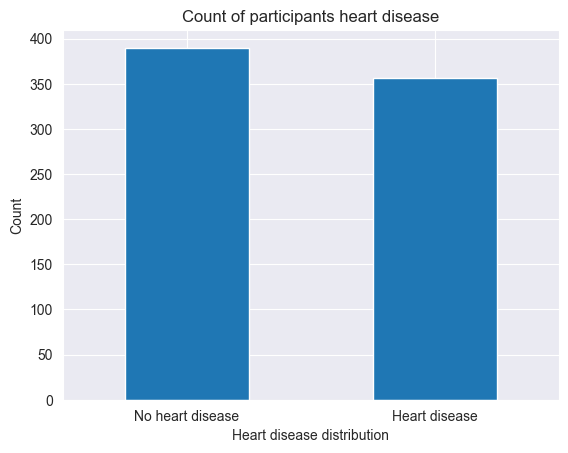

In [14]:
disease_mapping = {0: 'No heart disease', 1: 'Heart disease'}

# Use the map function to replace values in the disease column
x = df['HeartDisease'].map(disease_mapping)

# Count the number of males and females
gender_counts = x.value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of participants heart disease')
plt.xlabel('Heart disease distribution')
plt.ylabel('Count')
plt.show()

The conclusion drawn from analyzing the distribution of heart disease within the dataset reveals a near 50/50 split between positive and negative cases.

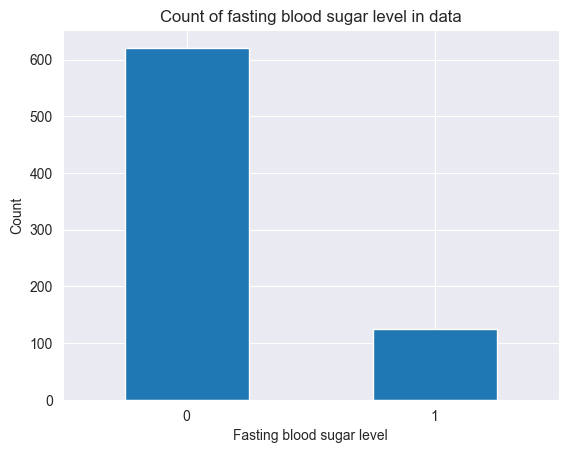

In [15]:
# Count the number of males and females
gender_counts = df['FastingBS'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of fasting blood sugar level in data')
plt.xlabel('Fasting blood sugar level')
plt.ylabel('Count')
plt.show()

In conclusion, within the dataset, the fasting blood sugar (fastingBS) attribute indicates a notable distribution, with approximately 200 instances featuring a value of 1 and around 700 instances displaying a value of 0. This observation suggests a significant imbalance in the distribution of fasting blood sugar levels among the sampled population, warranting further exploration into its potential implications for cardiovascular health and associated risk factors.

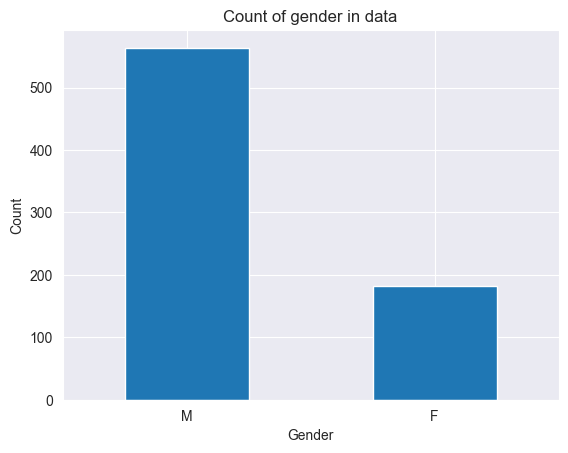

In [16]:
# Count the number of males and females
gender_counts = df['Sex'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of gender in data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In conclusion, the dataset reveals a notable gender disparity, with approximately 720 male participants compared to 190 female participants. This observation aligns with known epidemiological trends, as men generally have a higher predisposition to heart disease compared to pre-menopausal women. 

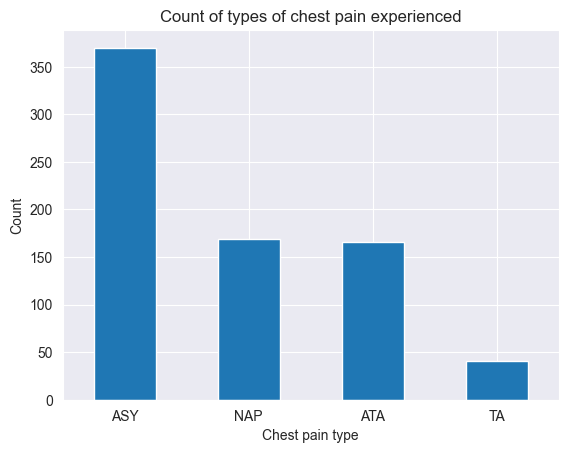

In [17]:
# Count the number of males and females
gender_counts = df['ChestPainType'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of types of chest pain experienced')
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.show()

In conclusion, the analysis of chest pain types within the dataset reveals that the majority of cases, approximately, predominantly involve ASY, where no chest discomfort is reported. Additionally, the occurrences of NAP and ATA are relatively balanced, with around 200 instances each. However, TA, representing typical symptoms associated with heart diseases, is notably lower, comprising approximately 50 instances.

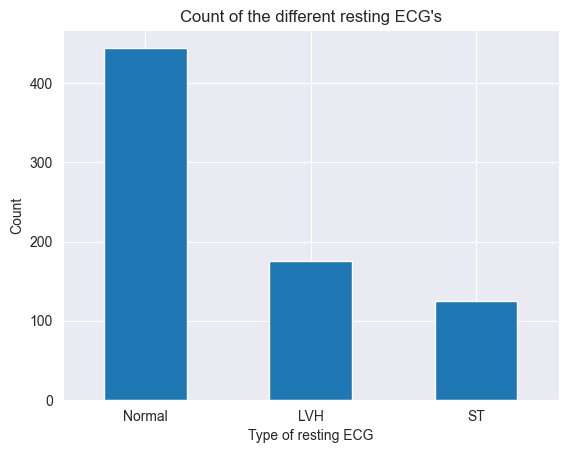

In [18]:
gender_counts = df['RestingECG'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Count of the different resting ECG's")
plt.xlabel('Type of resting ECG')
plt.ylabel('Count')
plt.show()


In conclusion, the distribution analysis of the resting electrocardiographic results indicates that the majority of cases, approximately 550 instances, exhibit a normal pattern. Conversely, both LVH (Left Ventricular Hypertrophy) and ST-T wave abnormality are relatively balanced, with occurrences ranging between 180 and 190 instances each.

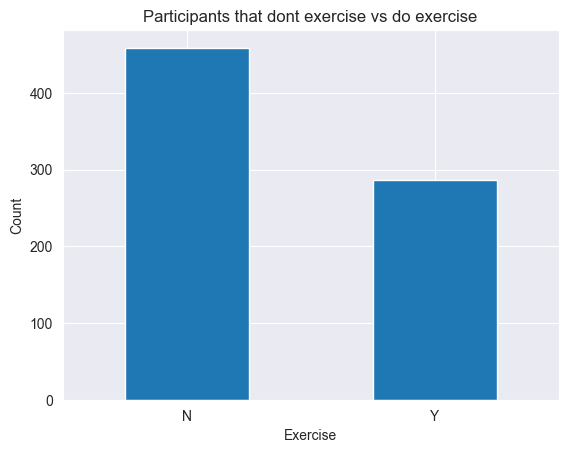

In [19]:
# Count the number of males and females
gender_counts = df['ExerciseAngina'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Participants that dont exercise vs do exercise')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()

In conclusion, the analysis of exercise angina within the dataset reveals that the majority of participants, approximately 550 individuals, do not engage in exercise, while around 380 individuals do exercise. 

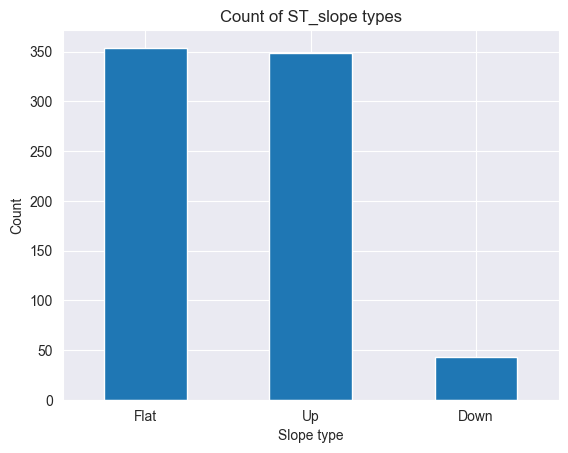

In [20]:
gender_counts = df['ST_Slope'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of ST_slope types')
plt.xlabel('Slope type')
plt.ylabel('Count')
plt.show()


In conclusion, upon analyzing the distribution of ST slope categories within the dataset, it is evident that the "flat" and "up" categories exhibit high frequencies, whereas occurrences of the "down" category are notably lower in comparison.

## EDA bivariaat

### A pair plot to visualize the correlation between the numeral data

To explore if there is a relationship between multiple numeric features and quickly identify patterns.Variable distributions are displayed by histograms along the diagonal, while pairwise relationships are displayed by scatterplots off the diagonal.

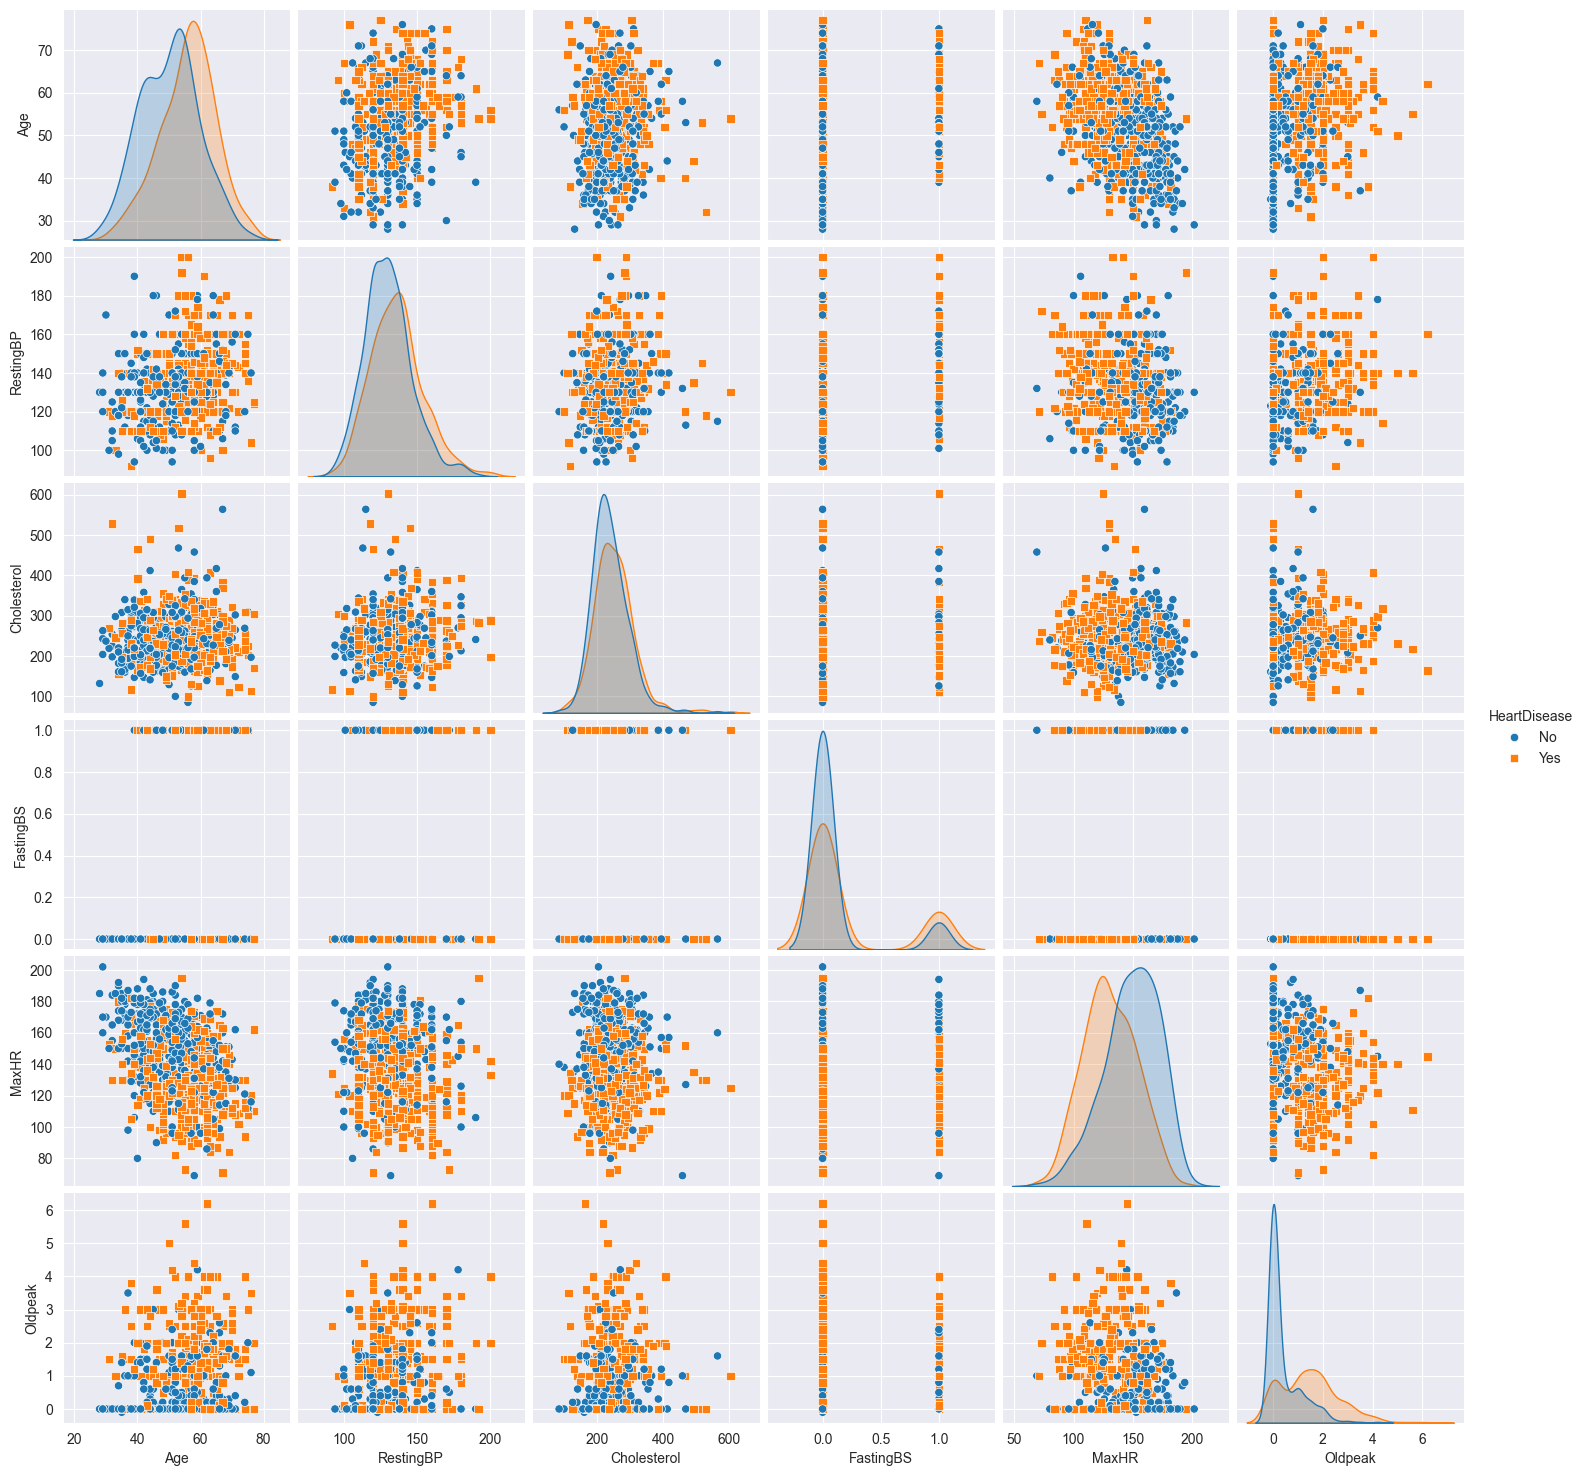

In [21]:
# heatmap
df_pair = df.copy()
disease = {0 : "No", 1 : "Yes"}
df_pair["HeartDisease"] = df_pair["HeartDisease"].map(disease)
sns.pairplot(df_pair, hue="HeartDisease", markers=["o", "s"])
plt.show()

Conclusion:
- The distributions of sns.pairplot that only contained the numerical attributes are quite similar for participants with and without a heart disease.

### Heatmap for corralation between nominal features
A heatmap is required to visualize relationships between nominal attributes. However, to utilize the heatmap function, these attributes must first be converted to numeric format. Only heart disease and fasting blood sugar (fastingBS) are currently represented as 0 or 1; the remaining attributes require conversion. One_hot_encoding is utilised in the conversion process.

In [22]:
hm_df = df[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS", "HeartDisease"]]
hm_df = pd.get_dummies(hm_df)


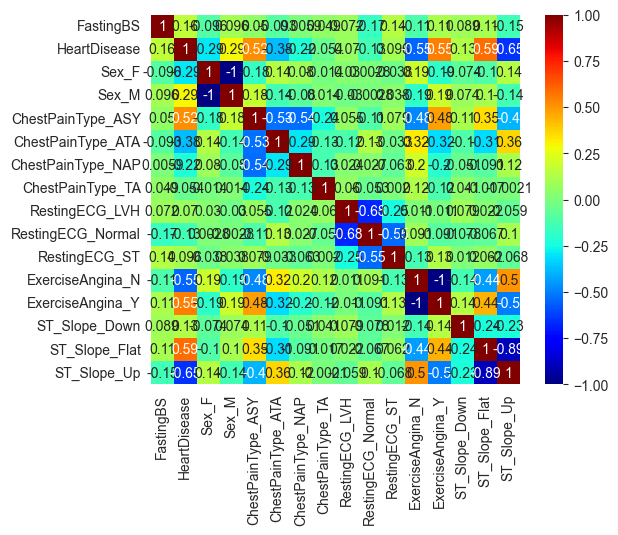

In [23]:
sns.heatmap(hm_df.corr(), annot=True, cmap="jet", vmin=-1.0, vmax=1.0, square=True)
plt.show()

In conclusion:
* The highest correlation coefficient of 0.49 indicates a moderate positive correlation between Heart Disease and Exercise Angina(yes), suggesting a tendency for them to increase together.
* Conversely, the lowest correlation coefficient of -0.65 indicates a moderate negative correlation between Heart Disease and ST Slope up, implying an inverse relationship. A similar negative correlation is observed between Exercise Angina and ST Slope.

### Boxplots between nominal and numeric features 

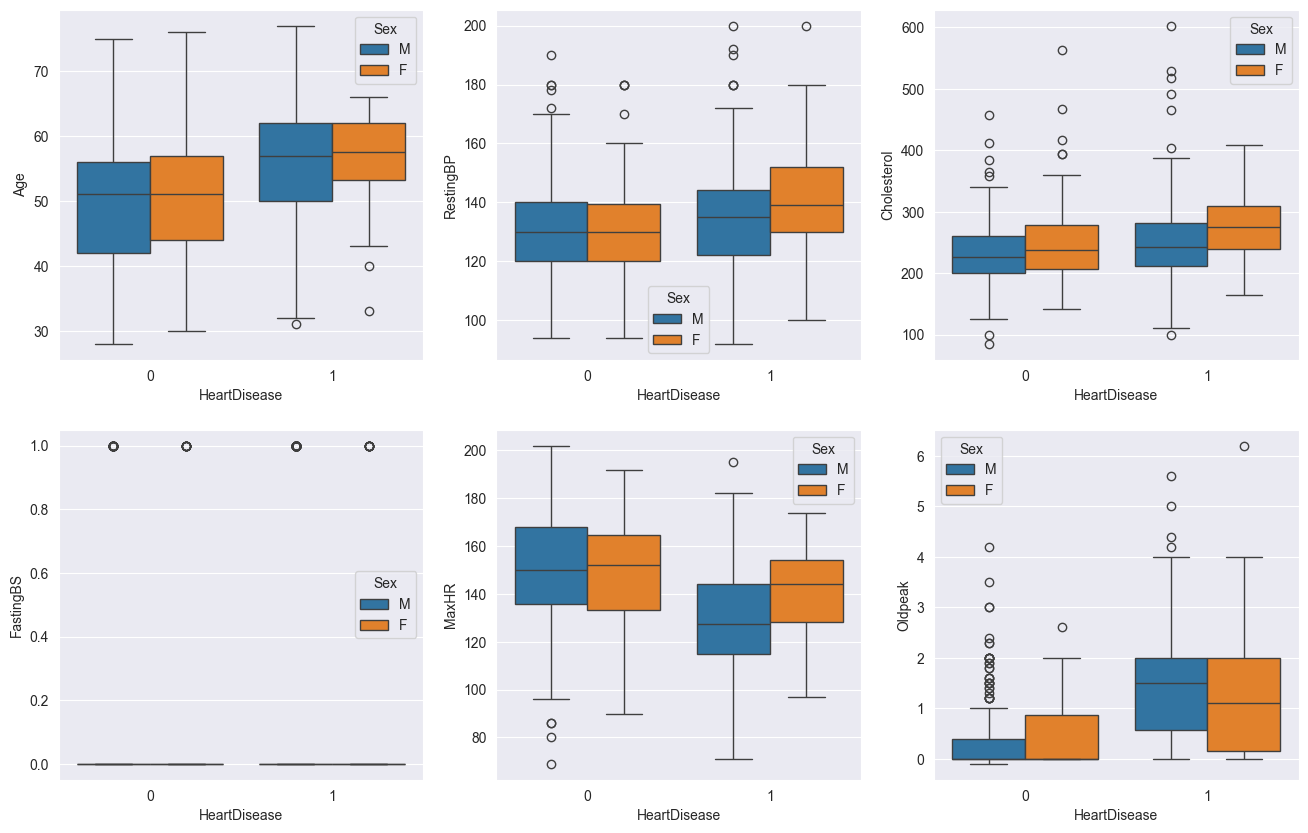

In [24]:
# here will be code for a boxplot
fig = plt.figure(figsize=(16.0, 10.0))
for index, attribute in enumerate(('Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak')):
    axs = fig.add_subplot(2, 3, index+1)
    sns.boxplot(df, x="HeartDisease", y=attribute, hue="Sex", ax=axs)
plt.show()

Conclusion:
- Higher age appears to correlate with an increased likelihood of having or developing heart disease, irrespective of gender.
- Resting blood pressure (RestingBP) shows relatively consistent values between individuals with and without heart disease, except for women with heart disease, whose values tend to be higher. Men with heart disease exhibit RestingBP levels similar to those without, while women demonstrate a slight elevation (approximately 10 units).
- The prevalence of zero values in cholesterol obscures potential gender and heart disease associations; however, without these zeros, cholesterol levels may show comparable patterns between genders and heart disease statuses.
- Individuals with heart disease tend to have lower maximum heart rates (MaxHR) compared to those without.
- Notably, there is a significant difference in Oldpeak values between individuals with heart disease and those without, indicating a potential diagnostic value for this attribute in distinguishing between the two groups.

### Found weird potential connections
In the following analysis, we delve into the relationship between heart disease and various attributes within our dataset. Through a series of barplots, we aim to uncover the association between heart disease status and several key factors, shedding light on potential risk factors and patterns. The attributes under examination encompass chest pain type, gender (sex), oldpeak values exceeding 3.7 (identified as outliers), fasting blood pressure (fastingBP) equal to 1 (identified as outliers in a boxplot), resting blood pressure (resting BP) at or above 170 (often associated with heart disease), maximum heart rate (maxHR) at or below 70 (typically linked to heart disease), and age categorized before and after 51 years (relevant due to menopause onset in women). Each barplot offers insights into how these factors may influence the likelihood of heart disease occurrence, facilitating a deeper understanding of the dataset's intricacies.

#### Heart disease vs OldPeak > 3.7

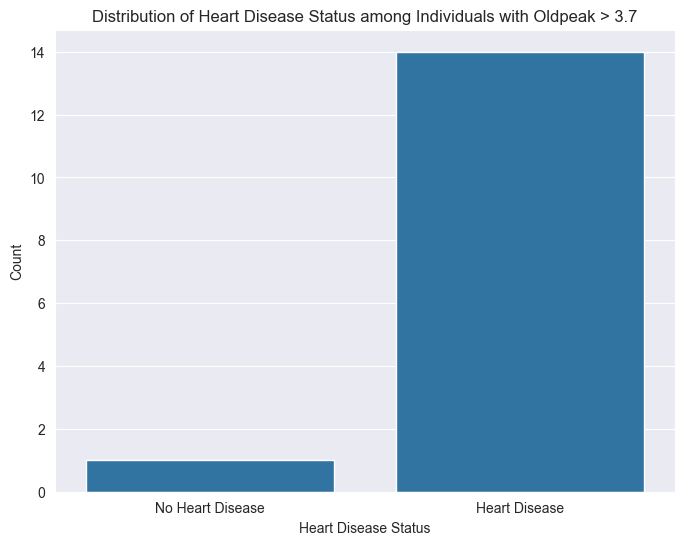

In [25]:
# Filter the DataFrame for Oldpeak values higher than 3.7
filtered_df = df[df['Oldpeak'] >= 3.7]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with Oldpeak > 3.7')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In conclusion, the analysis of individuals with an oldpeak value exceeding 3.7 reveals a noteworthy trend. Among these participants, only one individual is without heart disease, while fifteen individuals exhibit the presence of heart disease. This significant disparity suggests that an oldpeak value greater than 3.7 may serve as a strong indicator for the detection of heart disease. Such findings underscore the potential utility of oldpeak values as an important diagnostic factor, aiding in the identification and management of cardiovascular conditions.

#### Heart disease vs FastingBS = 1

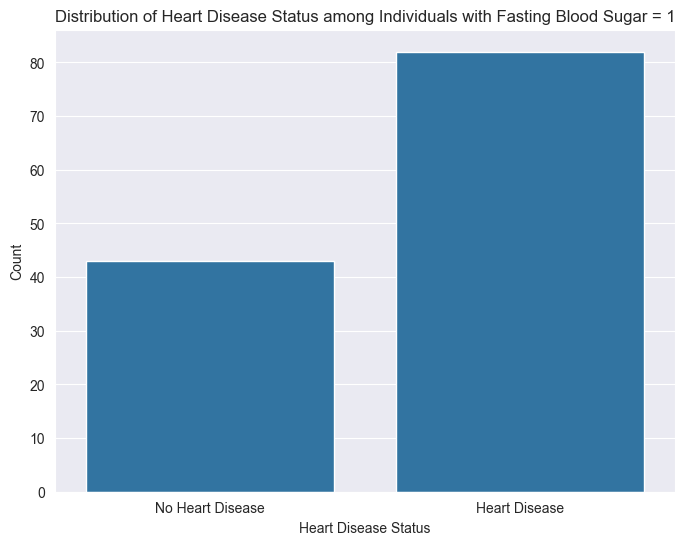

In [26]:
# Filter the DataFrame for fasting blood pressure value 1
filtered_df = df[df['FastingBS'] == 1]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with Fasting Blood Sugar = 1')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In the distribution analysis of heart disease status among individuals with fasting blood sugar equal to 1, the data reveals that approximately 45 individuals show no signs of heart disease, while around 170 individuals exhibit the presence of heart disease. This notable discrepancy underscores the potential association between elevated fasting blood sugar levels and an increased risk of heart disease.

#### Heart disease vs RestingBP >=170

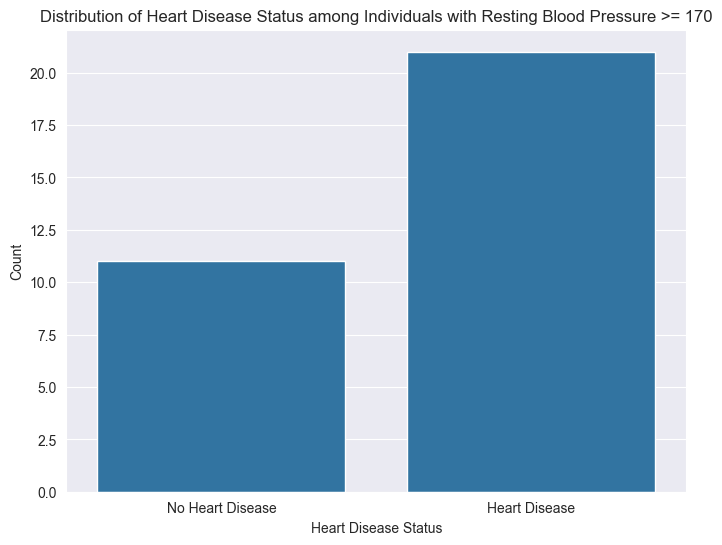

In [27]:
# Filter the DataFrame for resting blood pressure values greater than or equal to 170
filtered_df = df[df['RestingBP'] >= 170]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with Resting Blood Pressure >= 170')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of heart disease status among individuals with resting blood pressure equal to or above 170, the data reveals that 12 individuals show no signs of heart disease, while 28 individuals exhibit the presence of heart disease. This disparity suggests a potential association between elevated resting blood pressure levels and an increased risk of heart disease. 

#### Heart disease vs MaxHR <= 70

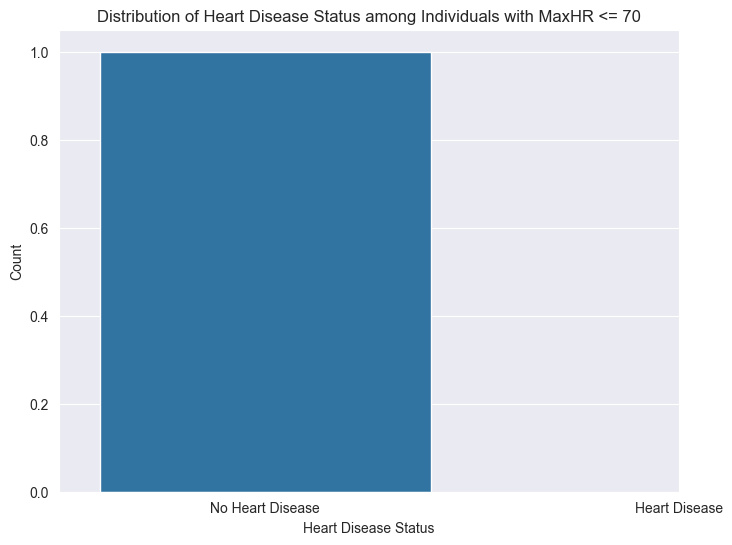

In [28]:
# Filter the DataFrame for maximum heart rate values less than or equal to 70 because i found that below 70 is most of the time considered for a cardiovascular disease
filtered_df = df[df['MaxHR'] <= 70]

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=filtered_df)
plt.title('Distribution of Heart Disease Status among Individuals with MaxHR <= 70')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of heart disease status among individuals with a maximum heart rate (MaxHR) equal to or below 70, the data indicates that only one individual shows no signs of heart disease, while three individuals exhibit the presence of heart disease.

#### Heart disease vs Menopause

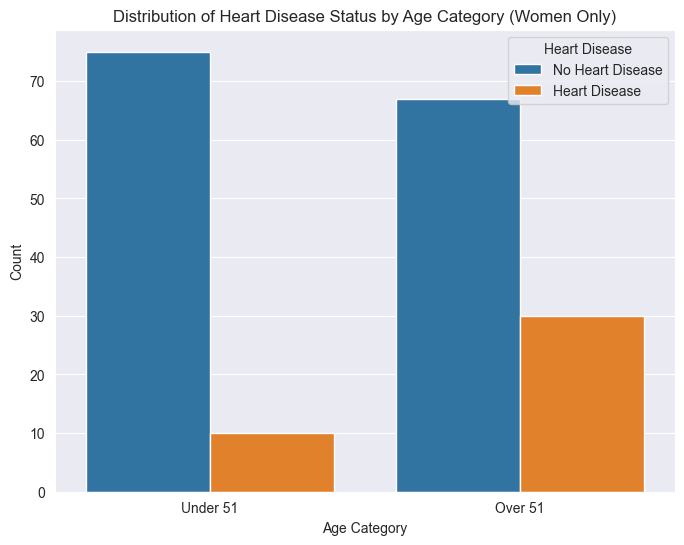

In [29]:
# Filter the DataFrame for female participants
female_df = df[df['Sex'] == 'F'].copy()

# Categorize age as under 51 and over 51
female_df.loc[:, 'AgeCategory'] = pd.cut(female_df['Age'], bins=[0, 51, float('inf')], labels=['Under 51', 'Over 51'])

# Create a barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeCategory', hue='HeartDisease', data=female_df)
plt.title('Distribution of Heart Disease Status by Age Category (Women Only)')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of heart disease status among women categorized by age, the data indicates that among women aged over 51, 36 individuals exhibit the presence of heart disease. Conversely, among women aged under 51, 12 individuals show signs of heart disease. These findings suggest a potential association between age and the prevalence of heart disease among women, with older women showing a higher likelihood of heart disease. This observed trend aligns with the notion that menopause, occurring around this age range, may contribute to the increased risk of heart disease among older women.

#### Heart disease vs ChestPainTypes

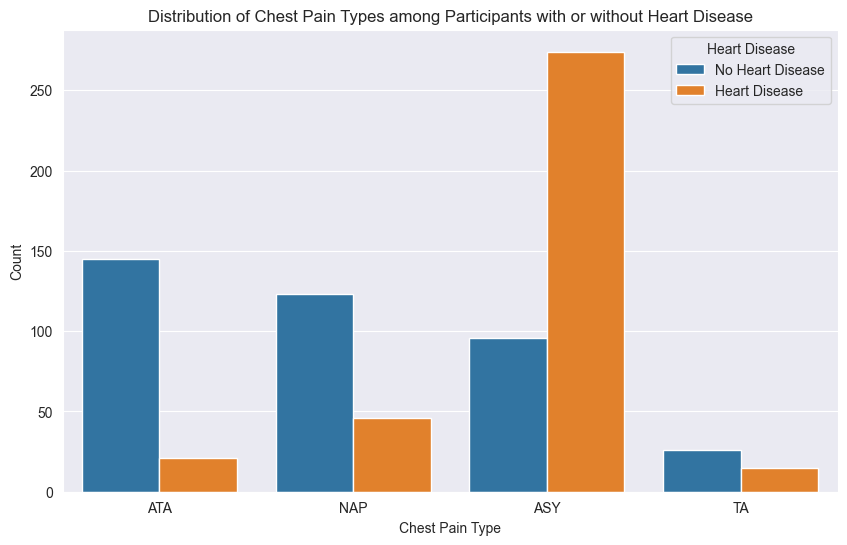

In [30]:
heart_disease_df = df[df['Sex'].isin(['M', 'F'])]

# Create a barplot
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=heart_disease_df)
plt.title('Distribution of Chest Pain Types among Participants with or without Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

The observed trend supports the idea that menopause, typically occurring around this age range, might play a role in elevating the risk of heart disease among older women.
* ASY appears to be prevalent among individuals with heart disease, with approximately 390 instances, compared to around 110 instances without heart disease.
* ATA shows a distribution of about 150 instances without heart disease and 25 instances with heart disease.
* NAP is associated with approximately 140 instances without heart disease and 75 instances with heart disease.
* TA is less common, with roughly 30 instances without heart disease and 20 instances with heart disease. 

These findings highlight ASY as a prevalent symptom among individuals with heart disease and suggest varying patterns among different types of chest pain in relation to heart disease occurrence.

#### Heart disease vs Gender

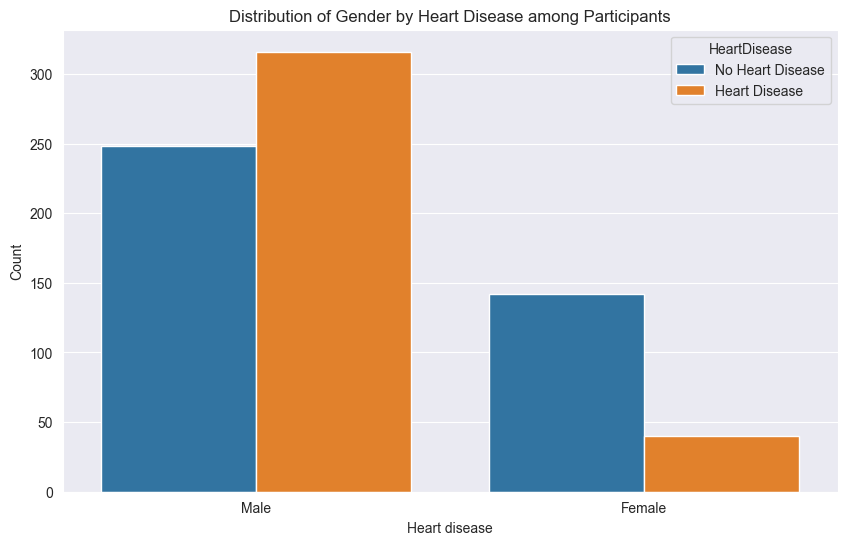

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Distribution of Gender by Heart Disease among Participants')
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.xticks(ticks=['M', 'F'], labels=['Male', 'Female'])
plt.legend(title='HeartDisease', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In the distribution analysis of gender by heart disease among participants, the data reveals:
- A significant proportion of male participants, with 470 individuals diagnosed with heart disease and 280 individuals showing no signs of the disease.
- Among female participants, 140 individuals exhibit no signs of heart disease, while 50 individuals are diagnosed with the disease.

These findings underscore a higher prevalence of heart disease among male participants compared to females.

# Machine learning

I trained a variety of machine learning models in this part and carefully chose the top three performers. 
I adjusted the hyperparameters of these models to maximise their performance through thorough experimentation. I finally chose one model and identified the ideal combination of hyperparameters that produced the most encouraging outcomes. 
To find the minimal subset of features required to maintain high accuracy levels, I also carried out a feature selection method. 
I then conducted a thorough model analysis, closely examining the performance of the selected model in conjunction with its optimised hyperparameters and feature selection. Because only necessary features were included for the final model to have the best predictive potential, this methodical approach guaranteed that the final model was efficient as well as accurate.


#### One hot encoding
One-hot encoding is used to transform categorical characteristics into a format that machine learning models can interpret, such as 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', and 'ST_Slope'. One-hot encoding converts categorical variables into binary vectors, where each category becomes a distinct feature, as most machine learning algorithms demand numerical input. This guarantees that categorical data will be correctly interpreted and utilised by the model for both training and prediction.


In [32]:
# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

df_encoded.replace({True: 1, False: 0}, inplace=True)

# Displaying the encoded DataFrame
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


#### Train, test and validation data
I separated the dataset into three different sets during the data preprocessing stage: training, testing, and validation. 
- The training set, which made about 75% of the total dataset, was the main source of information used to train the model. 
- The testing set, which included 17% of the total data, was used to evaluate the model's generalisation ability and performance on untested data. 
- Lastly, 8% of the dataset—an independent validation set—was set aside specifically for assessing the robustness and efficacy of the finished model.


In [33]:
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

In [34]:
# Split the data into training and temporary sets (80% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Further split the temporary set into validation and test sets (25% and 75% split)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

In [60]:
models = [
    DummyClassifier(),
    RandomForestClassifier(),
    BaggingClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    StackingClassifier(estimators=[("DesiontreeClasifier", DecisionTreeClassifier()),("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis())]),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    GaussianNB(),
    BernoulliNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier()
]

Here, cross-validation was utilized to evaluate the effectiveness of several machine learning models. We calculate the mean training and testing scores by iterating through a list of models and using a k-fold cross-validation approach (k=2 for simplicity). Comparing and sorting these scores according to model performance indicators is made easier by storing them in a DataFrame. 

In [61]:
# loop through models and train
# cross-validation
metric_scores = {}
for model in models:
    scores = cross_validate(model, X_train, y_train, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{type(model).__name__}"] = scores

df_ms = pd.DataFrame(metric_scores).T
# Sort DataFrame by multiple columns
df_sorted = df_ms.sort_values(by=['test_score', 'train_score'], ascending=[False, False])
df_sorted

C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,fit_time,score_time,test_score,train_score
RandomForestClassifier,1.212954,0.048877,0.853283,0.998208
GradientBoostingClassifier,1.609349,0.016951,0.851510,0.989279
HistGradientBoostingClassifier,0.338267,0.009474,0.847920,1.000000
ExtraTreesClassifier,1.070929,0.089762,0.847913,1.000000
GaussianNB,0.005482,0.003492,0.847913,0.853303
BernoulliNB,0.012462,0.004987,0.846134,0.846128
LinearDiscriminantAnalysis,0.003989,0.002492,0.844329,0.855076
StackingClassifier,0.535147,0.011145,0.842569,0.889068
BaggingClassifier,0.709351,0.104725,0.830037,0.987487
AdaBoostClassifier,0.693212,0.048878,0.819297,0.923073


conclusion:
- In comparison to their respective test results, __RandomForestClassifier, GradientBoostingClassifier, and HistGradientBoostingClassifier__ appear to have greater training scores. Given that these models perform remarkably well on training data but somewhat worse on test data that hasn't been seen, this disparity may indicate __some degree of overfitting__.
- Similar test and train scores for __GaussianNB and BernoulliNB__ show that the model's performance on training and test data is __well-balanced__. It's possible that these models don't overfit as much as the others do.
- Additionally, __LinearDiscriminantAnalysis__ displays a negligible change between test and train scores, indicating that it has __good data generalisation capabilities__.
- __StackingClassifier__ presents an intriguing opportunity as it combines the strengths of multiple models, potentially leveraging diverse features to enhance performance.
- Among the non-overfitting options, GaussianNB and BernoulliNB emerge as promising choices due to their balanced performance across training and test datasets. However, the unexpectedly high performance of LinearDiscriminantAnalysis warrants further investigation to ascertain its efficacy in the given context.

By assessing the accuracy, F1 score, and AUC (Area Under the Receiver Operating Characteristic Curve) for each model on the test dataset, we gain a understanding of predictive capabilities across different performance metrics.

In [37]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

metric_scores = {}
for model in models:
    fitted = model.fit(X_train, y_train)
    y_pred = fitted.predict(X_test)
    y_prob = fitted.predict_proba(X_test)
    # Assuming positive class is index 1 in y_prob
    y_prob_positive_class = y_prob[:, 1]
    metric_scores[type(model).__name__] = [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average="macro"),
        roc_auc_score(y_test, y_prob_positive_class, multi_class="ovr")
    ]
    
pd.DataFrame(metric_scores, index=["ACC", "$F_1$", "AUC"]).T


C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,ACC,$F_1$,AUC
DummyClassifier,0.547619,0.353846,0.500000
RandomForestClassifier,0.904762,0.903890,0.964531
BaggingClassifier,0.865079,0.863140,0.930587
AdaBoostClassifier,0.873016,0.871854,0.921688
GradientBoostingClassifier,0.912698,0.912028,0.969489
StackingClassifier,0.825397,0.823799,0.822400
ExtraTreesClassifier,0.880952,0.880038,0.964785
HistGradientBoostingClassifier,0.904762,0.903890,0.964658
DecisionTreeClassifier,0.833333,0.832479,0.834096
ExtraTreeClassifier,0.793651,0.791071,0.790236


Conclusion:

- It's interesting to see that certain models have good performance measures even when they appear to be overfit. This implies that even if they could be __fitting the training data too tightly__, they are nevertheless identifying significant patterns that translate well to new data.
- The top three models continue to achieve remarkably high scores even if they perform marginally worse than the overfitting models. This suggests that they achieve a compromise between identifying pertinent patterns and preventing overfitting, which could make them __more reliable options to be used in real-world situations__ where generalizability is essential.


 Stacking, a powerful ensemble technique, combines the predictions of multiple models to improve overall performance. By testing various combinations of models, including both potentially overfitting and well-generalizing ones, we seek to identify optimal strategies for building robust predictive models. This exploration is crucial for understanding how stacking can be leveraged to enhance predictive accuracy while guarding against overfitting, ultimately enabling more reliable predictions in real-world scenarios.

In [79]:
models_stack = {
    "Stack overfiting models":
    StackingClassifier(
        estimators=[
            ("RandomForestClassifier", RandomForestClassifier()),
            ("GradientBoostingClassifier", GradientBoostingClassifier()),
            ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
            ("ExtraTreesClassifier", ExtraTreesClassifier())
        ]
    ),
    "Stack non-overfitting models":
    StackingClassifier(
        estimators=[
            ("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()),
            ("GaussianNB", GaussianNB()),
            ("BernoulliNB", BernoulliNB())
        ]
    ),
    "Stack overfitting and non-overfitting":
    StackingClassifier(
        estimators=[
            ("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()),
            ("GaussianNB", GaussianNB()),
            ("BernoulliNB", BernoulliNB()),
            ("RandomForestClassifier", RandomForestClassifier()),
            ("GradientBoostingClassifier", GradientBoostingClassifier()),
            ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
            ("ExtraTreesClassifier", ExtraTreesClassifier())
        ]
    )
}

# Assuming X_train and y_train are defined somewhere in your code
metric_scores = {}
for name, model in models_stack.items():
    scores = cross_validate(model, X_train, y_train, cv=2, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[name] = scores

df_ms = pd.DataFrame(metric_scores).T
# Sort DataFrame by multiple columns
df_sorted = df_ms.sort_values(by=['test_score', 'train_score'], ascending=[False, False])
df_sorted

,fit_time,score_time,test_score,train_score
Stack overfitting and non-overfitting,3.729953,0.035571,0.858660,0.932040
Stack non-overfitting models,0.108036,0.005010,0.853290,0.858647
Stack overfiting models,3.995957,0.034029,0.853283,1.000000


conclusion:
- stacking with just overfitting models is overfitting itself aswell
- stacking non-overfitting is doing a little bit better and the same consistensy beteen train and test
- stacking with overfitting and non-overfitting is doing better aswell but is mildly overfitting but not as bad as overfitting

Evaluating various predictive models using multiple metrics

In [71]:
metric_scores = {}
for name, model in models_stack.items():
    fitted = model.fit(X_train, y_train)
    y_pred = fitted.predict(X_test)
    y_prob = fitted.predict_proba(X_test)
    # Assuming positive class is index 1 in y_prob
    y_prob_positive_class = y_prob[:, 1]
    metric_scores[name] = [
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average="macro"),
        roc_auc_score(y_test, y_prob_positive_class, multi_class="ovr")
    ]
pd.DataFrame(metric_scores, index=["ACC", "$F_1$", "AUC"]).T

,ACC,$F_1$,AUC
Stack overfiting models,0.912698,0.911759,0.966692
Stack non-overfitting models,0.896825,0.896296,0.962115
Stack overfitting and non-overfitting,0.936508,0.935927,0.969997


conclusion:
- Across all evaluation metrics, the stacking model combining overfitting and non-overfitting models consistently outperforms the other configurations

In [72]:
from sklearn.metrics import accuracy_score, classification_report
models = [LinearDiscriminantAnalysis(), GaussianNB(), BernoulliNB(), StackingClassifier(estimators=[("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()), ("GaussianNB", GaussianNB()), ("BernoulliNB", BernoulliNB()), ("RandomForestClassifier", RandomForestClassifier()), ("GradientBoostingClassifier", GradientBoostingClassifier()), ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()), ("ExtraTreesClassifier", ExtraTreesClassifier())])]
for model in models:
    # Train the model on the training data
    print(type(model).__name__)
    model = model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

LinearDiscriminantAnalysis
Accuracy: 0.9126984126984127
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        69
           1       0.90      0.91      0.90        57

    accuracy                           0.91       126
   macro avg       0.91      0.91      0.91       126
weighted avg       0.91      0.91      0.91       126

GaussianNB
Accuracy: 0.9047619047619048
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        69
           1       0.87      0.93      0.90        57

    accuracy                           0.90       126
   macro avg       0.90      0.91      0.90       126
weighted avg       0.91      0.90      0.90       126

BernoulliNB
Accuracy: 0.9206349206349206
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        69
           1       0.89      0.

(End) conclusion:
- Based on the classification reports, the StackingClassifier stands out as the top performer with the highest accuracy of 93.65% and balanced precision and recall for both classes. This indicates that it effectively combines the strengths of multiple base classifiers. 
- It's also worth noting that LinearDiscriminantAnalysis and BernoulliNB show promising results with accuracies above 90%, suggesting they could serve as reliable alternatives depending on specific requirements or constraints.

### Hyperparameters

Trying to decide what hyperparams make the models better. All hyperparms in a disct and going trough dict for best combination. Then to make a list of the models with their best params. and do further investigation on it.

In [181]:
# Define hyperparameters for each model
param_grid_lda = {'solver': ['svd', 'lsqr', 'eigen'], "shrinkage": ["auto", 0, 0.5,1]}
param_grid_bnb = {"alpha":[0.05,0.1,0.15,0.2]}
param_grid_sc = {"final_estimator":[RandomForestClassifier(), LogisticRegression(),  GaussianNB()], "passthrough":[True, False], "n_jobs":[1, 2, 3]}

# Create a list of tuples containing model class and corresponding parameter grid
    # (LinearDiscriminantAnalysis(), param_grid_lda),
    # (BernoulliNB(), param_grid_bnb),
models_params = [
    (StackingClassifier(estimators=[("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()), ("GaussianNB", GaussianNB()), ("BernoulliNB", BernoulliNB()), ("RandomForestClassifier", RandomForestClassifier()), ("GradientBoostingClassifier", GradientBoostingClassifier()), ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()), ("ExtraTreesClassifier", ExtraTreesClassifier())], stack_method="auto"),param_grid_sc)
]

# Iterate over models and parameterstrello
for model, param_grid in models_params:
    print(model.__class__.__name__)
    for scoring in ["accuracy", "average_precision", "roc_auc", "f1", 'recall']:
        # Perform GridSearchCV
        grid_search = GridSearchCV(model, param_grid, scoring=scoring)
        grid_search.fit(X_train, y_train)
    
        # Print best hyperparameters and best score
        print("Scoring used:", scoring)
        print("Best Hyperparameters:", grid_search.best_params_)
        print("Best Score:", grid_search.best_score_)


StackingClassifier


C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Scoring used: accuracy
Best Hyperparameters: {'final_estimator': GaussianNB(), 'n_jobs': 1, 'passthrough': False, 'stack_method': 'predict_proba'}
Best Score: 0.8586872586872587


C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Scoring used: average_precision
Best Hyperparameters: {'final_estimator': RandomForestClassifier(), 'n_jobs': 1, 'passthrough': False, 'stack_method': 'auto'}
Best Score: 0.8972124617806528


C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Scoring used: roc_auc
Best Hyperparameters: {'final_estimator': LogisticRegression(), 'n_jobs': 3, 'passthrough': False, 'stack_method': 'auto'}
Best Score: 0.9204549752270934


C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Scoring used: f1
Best Hyperparameters: {'final_estimator': GaussianNB(), 'n_jobs': 1, 'passthrough': False, 'stack_method': 'predict_proba'}
Best Score: 0.8543310276273651


C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aimee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Scoring used: recall
Best Hyperparameters: {'final_estimator': GaussianNB(), 'n_jobs': 1, 'passthrough': True, 'stack_method': 'auto'}
Best Score: 0.8609364081062194


uphere you can see the best hyperparms for the models
if you take the one here and look at the defaults then GaussianNB is 0.1% lower, LDA is 0.2% lower, and BernoulliNB is 0.7% lower

In [179]:
models_3 = [
    LinearDiscriminantAnalysis(solver="lsqr", shrinkage='auto'), 
    BernoulliNB(alpha=0.05),
    StackingClassifier(estimators=[("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()), ("GaussianNB", GaussianNB()), ("BernoulliNB", BernoulliNB()), ("RandomForestClassifier", RandomForestClassifier()), ("GradientBoostingClassifier", GradientBoostingClassifier()), ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()), ("ExtraTreesClassifier", ExtraTreesClassifier())], final_estimator=RandomForestClassifier(), passthrough=True, stack_method='auto', )
]

for model in models_3:
    # Train the model on the training data
    print(type(model).__name__)
    model = model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

LinearDiscriminantAnalysis
Accuracy: 0.9126984126984127
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        69
           1       0.90      0.91      0.90        57

    accuracy                           0.91       126
   macro avg       0.91      0.91      0.91       126
weighted avg       0.91      0.91      0.91       126

BernoulliNB
Accuracy: 0.9206349206349206
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        69
           1       0.87      0.96      0.92        57

    accuracy                           0.92       126
   macro avg       0.92      0.92      0.92       126
weighted avg       0.93      0.92      0.92       126

StackingClassifier
Accuracy: 0.9126984126984127
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        69
           1       0.88

Conclusion:
- LiniarDiscriminantAnalysis is 91.3%, the same as the default.
- GaussianNB is 89.6% auc, is 0.8% lower then default.
- BernoulliNB is 92% auc, the same as the default
- Stacking is 92.9%, is 0.7% lower then default.

checking is FP or FN is higher. i want FP to be higher and FN as low as possible because rather have false heart disease then miss one

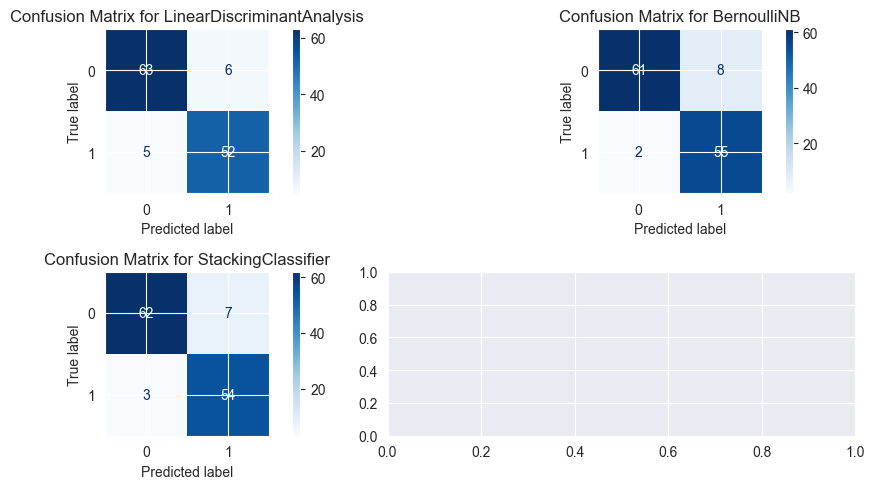

In [93]:
# Determine the number of rows and columns for subplots
num_models = len(models_3)
num_rows = (num_models + 1) // 2  # Add 1 to the number of rows if there's an odd number of models
num_cols = 2  # Maximum of 2 columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10.0, 5.0))

# Convert "HeartDisease" column to categorical dtype if it's not already
df_encoded['HeartDisease'] = df_encoded['HeartDisease'].astype('category')

for i, model in enumerate(models_3):
    # Fit the classifier and predict
    fitted_model = model.fit(X_train, y_train)
    y_pred = fitted_model.predict(X_test)
    
    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    
    # Calculate the position of the subplot
    row = i // num_cols
    col = i % num_cols
    
    # Determine the axes to plot
    ax = axes[col] if num_rows == 1 else axes[row, col]
    
    # Display confusion matrix plot
    disp = ConfusionMatrixDisplay(conf_mat, display_labels=df_encoded["HeartDisease"].cat.categories)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(f"Confusion Matrix for {type(model).__name__}")

plt.tight_layout()
plt.show()

Conclusion:
- just like before BernoulliNB looks the best. Only predicted 10(8%) wrong with 2 false negative(1.6%) and 8 false positive(6%).
- GaussianNB has a higher FN and FP then BernoulliNB
- LiniarDiscriminatAnalysis has a higher FN then both of them but the lowest FP

ROC-curve vissualization with ROC-AUC

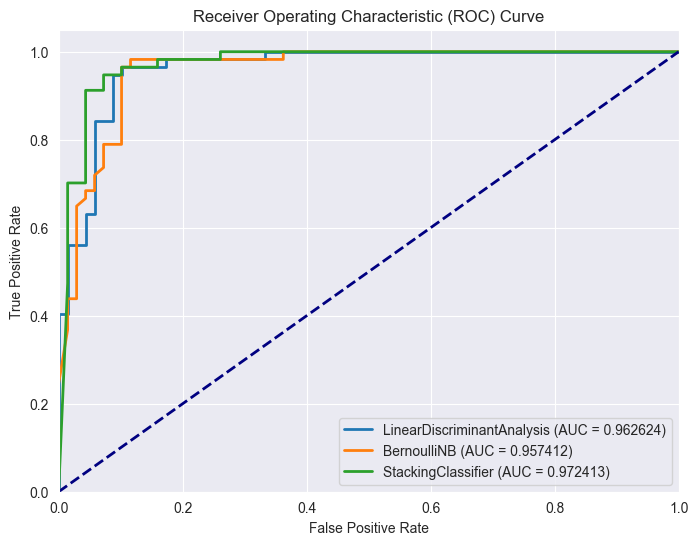

In [94]:
plt.figure(figsize=(8, 6))
for model in models_3:
    # Fit model
    model_name = type(model).__name__
    model_tr = model.fit(X_train, y_train)

    # Predict probabilities
    probs = model_tr.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.6f)' % (model_name, roc_auc))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Conclusion:
- GaussianNB is the highest AUC
- Linear and BernoulliNB are about the same 

## Atribute selection

Feature selection, checking if the models need all the atributes that is in the data or if the next rescearcher can save monney by using less and having a little less accurate prediction but saved a lot of monney

In [95]:
metric_scores = {}
length = len(X.columns.tolist())
for k in range(length, 0, -1):
    for model in models_3:
        selector = SelectKBest(k=k)
        X_select = selector.fit_transform(X_train, y_train)
        scores = cross_validate(model, X_select, y_train, return_train_score=True)
        for key, val in scores.items():
            scores[key] = val.mean() # maybe add auc and aucroc
        metric_scores[f"{type(model).__name__}, {k} features"] = scores

df_ms_f = pd.DataFrame(metric_scores).T
df_sorted_f = df_ms_f.sort_values(by=['test_score', 'train_score'], ascending=[False, False])
df_sorted_f

,fit_time,score_time,test_score,train_score
"StackingClassifier, 14 features",7.797461,0.042279,0.858687,0.910556
"StackingClassifier, 15 features",4.707833,0.022926,0.858687,0.909214
"StackingClassifier, 20 features",6.855197,0.029126,0.856918,0.909214
"StackingClassifier, 13 features",5.150763,0.021942,0.856885,0.911899
"StackingClassifier, 16 features",6.324170,0.036642,0.853314,0.907872
"StackingClassifier, 7 features",4.035388,0.022914,0.851480,0.900273
"StackingClassifier, 18 features",5.277712,0.026936,0.849759,0.907873
"StackingClassifier, 19 features",5.897233,0.027302,0.849759,0.907424
"LinearDiscriminantAnalysis, 12 features",0.006582,0.001197,0.849743,0.860911
"StackingClassifier, 10 features",5.050350,0.025134,0.849727,0.905636


BernoulliNB and 5 features because bernoulliNB is the least FN and the accuarcy and test_score is good, AUC is less the the other 2 but with atribute selction i hope it will get better. overal a goodone. only 1.3% less test_score vs GaussianNB with 13 features.

need to decide with kselect we can see how much effect certain features have 

In [115]:
columns_X = X_train.columns.tolist()

selector = SelectKBest(k=len(columns_X)).fit(X_train, y_train)

feature_scores = pd.DataFrame({"Attribute": columns_X, "Score": selector.scores_}).sort_values("Score", ascending=False)
feature_scores

,Attribute,Score
19,ST_Slope_Up,385.968654
18,ST_Slope_Flat,288.295860
16,ExerciseAngina_Y,245.781834
15,ExerciseAngina_N,245.781834
8,ChestPainType_ASY,216.211381
5,Oldpeak,163.591630
4,MaxHR,100.701599
9,ChestPainType_ATA,87.099722
0,Age,57.515420
6,Sex_F,43.128642


the 5 would then be ST_Slope_Flat, ST_Slope_Down, ExerciseAngina_N, RestingECG_ST and Sex_M

In [116]:
# Create instances of SelectFpr and SelectFdr with f_classif scoring function
select_fpr = SelectFpr(score_func=f_classif, alpha=0.05)
select_fdr = SelectFdr(score_func=f_classif, alpha=0.05)

# Fit the feature selectors
select_fpr.fit(X_train, y_train)
select_fdr.fit(X_train, y_train)

# Transform the data to select features
X_selected_fpr = select_fpr.transform(X_test)
X_selected_fdr = select_fdr.transform(X_test)

print("Original number of features:", X_train.shape[1])
print("Number of selected features using SelectFpr:", X_selected_fpr.shape[1])
print("Number of selected features using SelectFdr:", X_selected_fdr.shape[1])


Original number of features: 20
Number of selected features using SelectFpr: 17
Number of selected features using SelectFdr: 17


In [117]:
# Define a function to evaluate classifiers using different metrics
def evaluate_classifier(classifier, X, y, num_folds=5):
    # Perform cross-validation
    cv_scores_accuracy = cross_val_score(classifier, X, y, cv=num_folds, scoring='accuracy')
    cv_scores_precision = cross_val_score(classifier, X, y, cv=num_folds, scoring='precision')
    cv_scores_recall = cross_val_score(classifier, X, y, cv=num_folds, scoring='recall')
    cv_scores_f1 = cross_val_score(classifier, X, y, cv=num_folds, scoring='f1')
    cv_scores_roc_auc = cross_val_score(classifier, X, y, cv=num_folds, scoring='roc_auc')
    
    # Print mean and standard deviation for each metric
    print("Accuracy: Mean =", cv_scores_accuracy.mean(), "Std =", cv_scores_accuracy.std())
    print("Precision: Mean =", cv_scores_precision.mean(), "Std =", cv_scores_precision.std())
    print("Recall: Mean =", cv_scores_recall.mean(), "Std =", cv_scores_recall.std())
    print("F1-score: Mean =", cv_scores_f1.mean(), "Std =", cv_scores_f1.std())
    print("ROC-AUC: Mean =", cv_scores_roc_auc.mean(), "Std =", cv_scores_roc_auc.std())

# Example usage:
# Assuming 'classifier' is the trained classifier and 'X' and 'y' are the feature matrix and target variable
for classifier in models_3:
    print(type(classifier).__name__)
    evaluate_classifier(classifier, X, y)
    print("\n")


LinearDiscriminantAnalysis
Accuracy: Mean = 0.8524921700223713 Std = 0.07223977899546893
Precision: Mean = 0.8330957267427855 Std = 0.0715931415543798
Recall: Mean = 0.8651408450704225 Std = 0.09826152005816943
F1-score: Mean = 0.847227906143023 Std = 0.07657058442036761
ROC-AUC: Mean = 0.9161650816580394 Std = 0.050297453693110124


BernoulliNB
Accuracy: Mean = 0.852510067114094 Std = 0.053939987706445154
Precision: Mean = 0.835289238069657 Std = 0.05921595612337694
Recall: Mean = 0.8624021909233177 Std = 0.0637553864597494
F1-score: Mean = 0.8479102315326574 Std = 0.05572691593803362
ROC-AUC: Mean = 0.9129594518679026 Std = 0.0468867944820433


StackingClassifier
Accuracy: Mean = 0.8605458612975392 Std = 0.06629249470026886
Precision: Mean = 0.8410486530589164 Std = 0.06000483415145419
Recall: Mean = 0.8764475743348983 Std = 0.0896292920239241
F1-score: Mean = 0.8569846313767288 Std = 0.06702403935718647
ROC-AUC: Mean = 0.9171883150756391 Std = 0.0475040630440331



### Model evaluation

now to combined what we found at model selection, hyperparams selection and feature selection. We going to test the "perfect" model.

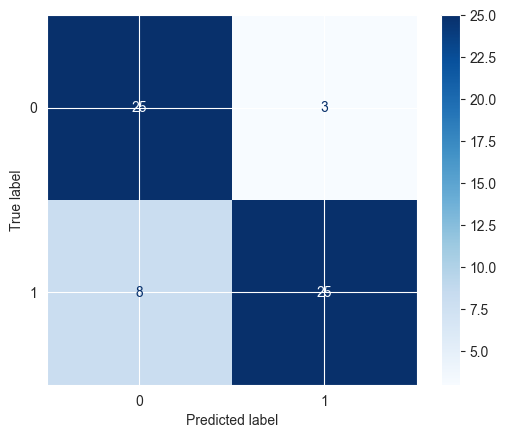

In [152]:
X_select = X_train[feature_scores["Attribute"].iloc[:20].tolist()]
X_valid_selected = X_valid[X_select.columns]
model = StackingClassifier(estimators=[("LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()), ("GaussianNB", GaussianNB()), ("BernoulliNB", BernoulliNB()), ("RandomForestClassifier", RandomForestClassifier()), ("GradientBoostingClassifier", GradientBoostingClassifier()), ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()), ("ExtraTreesClassifier", ExtraTreesClassifier())], final_estimator=GaussianNB(), passthrough=True, stack_method='auto').fit(X_select, y_train)
y_prob = model.predict_proba(X_valid_selected)
y_pred = model.predict(X_valid_selected)
conf_mat = confusion_matrix(y_valid, y_pred)

ConfusionMatrixDisplay(conf_mat, display_labels=df_encoded["HeartDisease"].cat.categories).plot(cmap=plt.cm.Blues)
plt.show()

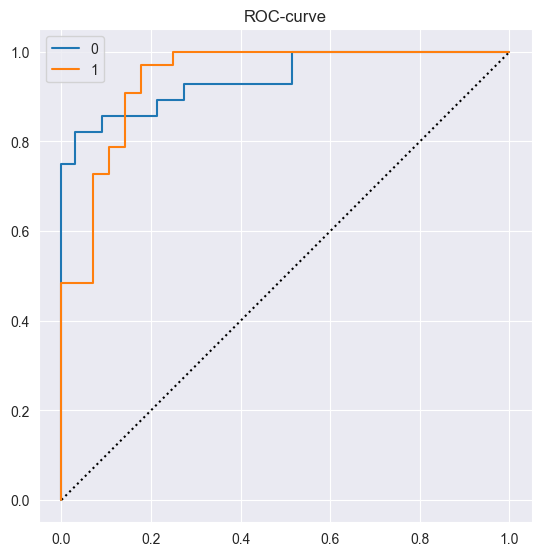

In [128]:
scores = {"label": [], "AUC": []}
plt.figure(figsize=(6.4, 6.4))
plt.plot([0, 1], [0, 1], ":k")
for index, label in enumerate(df_encoded["HeartDisease"].cat.categories):
    fpr, tpr, _ = roc_curve(y_valid == index, y_prob[:, index])
    scores["label"].append(label)
    scores["AUC"].append(roc_auc_score(y_valid == index, y_prob[:, index]))
    plt.plot(fpr, tpr, label=label)
plt.axis("square"); plt.grid(True); plt.title("ROC-curve"); plt.legend(); plt.show()

In [129]:
pd.DataFrame(scores).set_index("label")

,AUC
label,
0,0.940476
1,0.940476
